# MovieLens Data Set from Kaggle
## Sathwik Kesappragada analysis
### P1. Data wrangling

In [1]:
#call all import statements and their necessary pacakges
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/Downloads/3405_6663_bundle_archive/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [3]:
#45466 movies 
movies.shape

(45466, 23)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

In [5]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [6]:
#looking at one element
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [7]:
#want to redo, with function
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [8]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


In [9]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Alice in Wonderland              8
Hamlet                           8
Macbeth                          7
A Christmas Carol                7
Les Misérables                   7
The Three Musketeers             7
Cinderella                       7
Blackout                         6
Treasure Island                  6
Heidi                            6
The Hound of the Baskervilles    6
King Lear                        6
Jane Eyre                        6
Frankenstein                     6
Wuthering Heights                6
Name: original_title, dtype: int64

In [10]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,15000000,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [11]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008                                   3
Clockstoppers, 3/17/2002                               2
รักที่ขอนแก่น, 9/2/2015                                2
Pokémon 3: The Movie, 7/8/2000                         2
Broderskab, 10/21/2009                                 2
                                                      ..
Der Tunnel, 10/26/1933                                 1
Vercingétorix, 1/24/2001                               1
La blonde de Pékin, 8/25/1967                          1
La révolution n'est pas un dîner de gala, 12/1/2015    1
Tattoo, 10/9/1981                                      1
Length: 45349, dtype: int64

In [12]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [13]:
movies[['original_title', 'release_date']].nunique()

original_title    43371
release_date      17336
dtype: int64

In [14]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [15]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Chaos Theory, 3/14/2008                         1
Napola – Elite für den Führer, 7/4/2004         1
Gekijouban Trigun: Badlands Rumble, 4/2/2010    1
Russell Peters: Outsourced, 8/1/2006            1
Белка и Стрелка. Звёздные собаки, 3/18/2010     1
                                               ..
思い出のマーニー, 7/19/2014                             1
Der Tunnel, 10/26/1933                          1
Vercingétorix, 1/24/2001                        1
La blonde de Pékin, 8/25/1967                   1
Tattoo, 10/9/1981                               1
Length: 45349, dtype: int64

In [16]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [17]:
#checking to see how many revenue values are 0
count_revenue_zero = sum(map(lambda x : x == 0, movies['revenue']))
print(count_revenue_zero)

38032


In [18]:
#for some odd reason this is giving the wrong count
#there exists elements in the df that have 0 under budget
count_budget_zero = sum(map(lambda x : x == 0, movies['budget']))
print(count_budget_zero)

0


In [19]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [20]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [21]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [22]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [23]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}, {'iso_3...",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [24]:
movies['genres'].value_counts()

[Drama]                                                                           4996
[Comedy]                                                                          3620
[Documentary]                                                                     2721
[]                                                                                2442
[Drama, Romance]                                                                  1300
                                                                                  ... 
[Action, Adventure, Animation, Comedy, Family, Horror]                               1
[Drama, Thriller, Documentary]                                                       1
[Action, Animation, Comedy, Science Fiction]                                         1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [25]:
#drama_genres = movies['genres'].groupby(['Drama']).sum()
#print(drama_genres)
#movies_genres_means = movies.groupby(by='genres')['vote_average'].mean()
#movies_genres_means.head()
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [26]:
#print(movies.columns.isin(movies.genres).any())
movies['1orMore'] = movies['genres'].str.len()

#for row in movies['genres']:
#    if(movies['genres'].length) > 1 ):
#        movies['1orMore'] = 0
#    else:
#       movies['1orMore'] = 1
movies['1orMore']    

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: 1orMore, Length: 45436, dtype: int64

In [27]:
movies['1orMore'].value_counts() #2442 movies don't have any genre 

1    14552
2    14471
3     9579
4     3378
0     2442
5      830
6      157
7       24
8        3
Name: 1orMore, dtype: int64

In [28]:
movie_with_one = movies[movies['1orMore'] == 1]

In [29]:
movie_with_two = movies[movies['1orMore'] == 2]

In [30]:
movie_with_one['genres'].value_counts()

[Drama]              4996
[Comedy]             3620
[Documentary]        2721
[Horror]              974
[Thriller]            465
[Western]             318
[Action]              278
[Animation]           242
[Science Fiction]     198
[Crime]               134
[Adventure]           110
[Music]               109
[Romance]              97
[Family]               91
[Mystery]              70
[Fantasy]              51
[War]                  37
[Foreign]              19
[History]              15
[TV Movie]              7
Name: genres, dtype: int64

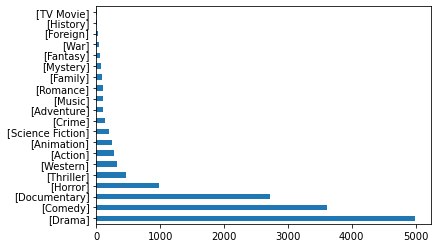

In [31]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres

In [32]:
#movies_means = movie_with_one.groupby('genres')[['budget','revenue']].mean()

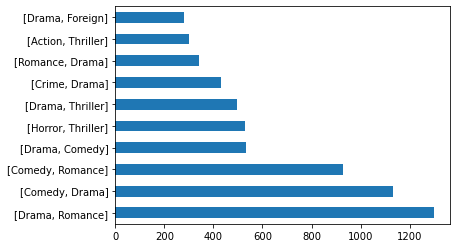

In [33]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs

In [34]:
movie_small = pd.melt(movies, 
                        id_vars = ['original_title', 'vote_average', 'vote_count', 'id', 'genres', 
                                    'popularity','release_date', 'budget', 'revenue', 'runtime'])

In [35]:
movie_small.head()

,original_title,vote_average,vote_count,id,genres,popularity,release_date,budget,revenue,runtime,variable,value
0,Toy Story,7.7,5415.0,862,"[Animation, Comedy, Family]",21.946943,1995-10-30,30000000,373554033.0,81.0,adult,FALSE
1,Jumanji,6.9,2413.0,8844,"[Adventure, Fantasy, Family]",17.015539,1995-12-15,65000000,262797249.0,104.0,adult,FALSE
2,Grumpier Old Men,6.5,92.0,15602,"[Romance, Comedy]",11.7129,1995-12-22,0,0.0,101.0,adult,FALSE
3,Waiting to Exhale,6.1,34.0,31357,"[Comedy, Drama, Romance]",3.859495,1995-12-22,16000000,81452156.0,127.0,adult,FALSE
4,Father of the Bride Part II,5.7,173.0,11862,[Comedy],8.387519,1995-02-10,0,76578911.0,106.0,adult,FALSE


In [36]:
movie_small = movie_small.rename(columns = {'original_title': 'title'})

In [37]:
movie_small.head()

,title,vote_average,vote_count,id,genres,popularity,release_date,budget,revenue,runtime,variable,value
0,Toy Story,7.7,5415.0,862,"[Animation, Comedy, Family]",21.946943,1995-10-30,30000000,373554033.0,81.0,adult,FALSE
1,Jumanji,6.9,2413.0,8844,"[Adventure, Fantasy, Family]",17.015539,1995-12-15,65000000,262797249.0,104.0,adult,FALSE
2,Grumpier Old Men,6.5,92.0,15602,"[Romance, Comedy]",11.7129,1995-12-22,0,0.0,101.0,adult,FALSE
3,Waiting to Exhale,6.1,34.0,31357,"[Comedy, Drama, Romance]",3.859495,1995-12-22,16000000,81452156.0,127.0,adult,FALSE
4,Father of the Bride Part II,5.7,173.0,11862,[Comedy],8.387519,1995-02-10,0,76578911.0,106.0,adult,FALSE


In [38]:
movie_small.dtypes

title                   object
vote_average           float64
vote_count             float64
id                      object
genres                  object
popularity              object
release_date    datetime64[ns]
budget                  object
revenue                float64
runtime                float64
variable                object
value                   object
dtype: object

In [39]:
movie_small['id'] = pd.to_numeric(movie_small['id'], errors = 'coerce')

In [40]:
movie_small.dtypes

title                   object
vote_average           float64
vote_count             float64
id                     float64
genres                  object
popularity              object
release_date    datetime64[ns]
budget                  object
revenue                float64
runtime                float64
variable                object
value                   object
dtype: object

In [41]:
movie_small.isnull().sum()

title                0
vote_average        84
vote_count          84
id                  42
genres               0
popularity          70
release_date      1260
budget               0
revenue             84
runtime           3682
variable             0
value           105112
dtype: int64

In [42]:
movie_small[movie_small['id'].isna()]

,title,vote_average,vote_count,id,genres,popularity,release_date,budget,revenue,runtime,variable,value
19722,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Carousel Productions, Vision View Entertainme...",NaN,NaT,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,adult,- Written by Ørnås
29483,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,NaN,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",NaN,NaT,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,NaN,adult,Rune Balot goes to a casino connected to the ...
35564,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",Beware Of Frost Bites,NaT,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,NaN,NaN,adult,Avalanche Sharks tells the story of a bikini ...
65158,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Carousel Productions, Vision View Entertainme...",NaN,NaT,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,belongs_to_collection,0.065736
74919,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,NaN,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",NaN,NaT,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,NaN,belongs_to_collection,1.931659
81000,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",Beware Of Frost Bites,NaT,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,NaN,NaN,belongs_to_collection,2.185485
110594,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Carousel Productions, Vision View Entertainme...",NaN,NaT,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,homepage,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso..."
120355,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,NaN,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",NaN,NaT,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,NaN,NaN,homepage,"[{'iso_3166_1': 'US', 'name': 'United States o..."
126436,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",Beware Of Frost Bites,NaT,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,NaN,NaN,homepage,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]"
156030,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,NaN,"[Carousel Productions, Vision View Entertainme...",NaN,NaT,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,NaN,NaN,imdb_id,0


In [43]:
movie_small_non = movie_small[movie_small['vote_average'].notna()]

In [44]:
movie_small_non.head()

,title,vote_average,vote_count,id,genres,popularity,release_date,budget,revenue,runtime,variable,value
0,Toy Story,7.7,5415.0,862.0,"[Animation, Comedy, Family]",21.946943,1995-10-30,30000000,373554033.0,81.0,adult,FALSE
1,Jumanji,6.9,2413.0,8844.0,"[Adventure, Fantasy, Family]",17.015539,1995-12-15,65000000,262797249.0,104.0,adult,FALSE
2,Grumpier Old Men,6.5,92.0,15602.0,"[Romance, Comedy]",11.7129,1995-12-22,0,0.0,101.0,adult,FALSE
3,Waiting to Exhale,6.1,34.0,31357.0,"[Comedy, Drama, Romance]",3.859495,1995-12-22,16000000,81452156.0,127.0,adult,FALSE
4,Father of the Bride Part II,5.7,173.0,11862.0,[Comedy],8.387519,1995-02-10,0,76578911.0,106.0,adult,FALSE


In [45]:
movie_small_non.count()

title           636020
vote_average    636020
vote_count      636020
id              636020
genres          636020
popularity      636020
release_date    634844
budget          636020
revenue         636020
runtime         632422
variable        636020
value           530945
dtype: int64

In [46]:
ratings = pd.read_csv('C:/Users/sathw/Downloads/3405_6663_bundle_archive/ratings.csv', nrows = 200000, low_memory = False)
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [47]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [48]:
ratings.id = ratings.id.astype(float)

In [49]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   id         200000 non-null  float64
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 6.1 MB


In [50]:
#combined_df = pd.merge(diff_look_clean,ratings, on = 'id')

In [51]:
#combined_df.info()

movie['post_proc'] = movie[genres'].apply(clean, axis=1)

In [52]:
#combined_df.head(10)

In [53]:
#combined_df.groupby(by ='title')[['vote_average', 'vote_count']].max().sort_values(by = 'vote_count', ascending = False)

In [54]:
#basically a vote count <- checks for duplicates
#combined_df['title'].value_counts()

In [55]:
#combined_df[combined_df['title'].str.contains('Jaws')]